In [27]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a Pandas DataFrame for easier manipulation
# The data is in iris.data and column names are in iris.feature_names
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# The target labels (species) are in iris.target
y = pd.Series(iris.target, name='species')

# Display the first 5 rows of the features
print("--- Features (X) ---")
X.head()

#print(X)
#print("---- Labels (y) ----")
#y.head
#print(y)

--- Features (X) ---


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
# Get a concise summary of the DataFrame
print("--- DataFrame Info ---")
X.info()


print("\n--- Descriptive Statistics ---")
X.describe()

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB

--- Descriptive Statistics ---


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


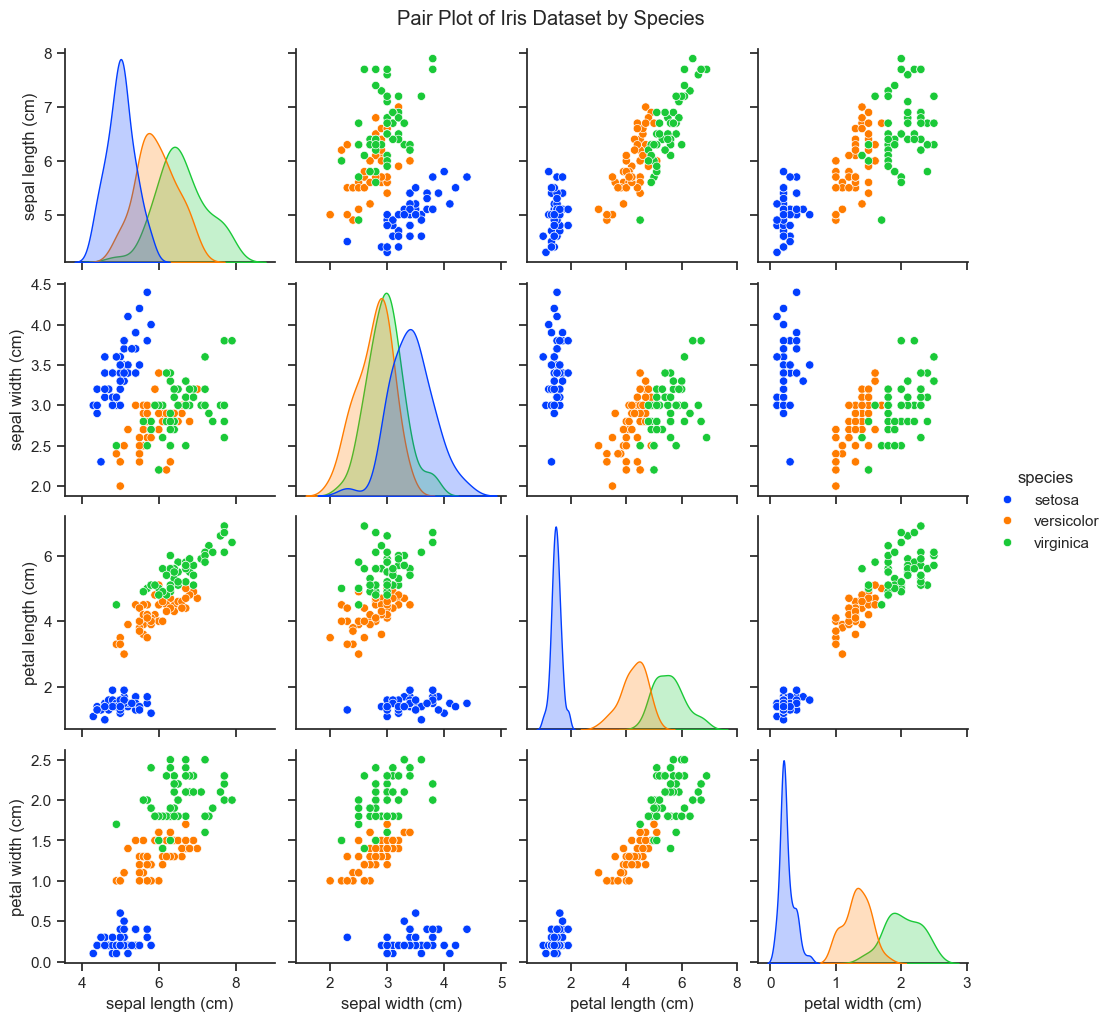

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# To make our plots look a little nicer
sns.set_theme(style="ticks")

# Create the pairplot
# We'll use a temporary DataFrame that combines features (X) and the target (y) for coloring
temp_df = X.copy()
temp_df['species'] = y.map({0: 'setosa', 1: 'versicolor', 2: 'virginica'}) # Map numbers to names

sns.pairplot(temp_df, hue='species', palette='bright')
plt.suptitle("Pair Plot of Iris Dataset by Species", y=1.02) # Add a title above the plot
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Split the data into training and testing sets
# We'll use 80% of the data for training and 20% for testing.
# random_state ensures we get the same split every time we run the code.
# stratify=y ensures the proportion of each species is the same in both train and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("--- Data Split ---")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print("\nTraining set species distribution:")
print(y_train.value_counts(normalize=True))
print("\nTesting set species distribution:")
print(y_test.value_counts(normalize=True))

# 2. Scale the features
scaler = StandardScaler()

# Fit the scaler ON THE TRAINING DATA ONLY and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the SAME FITTED scaler to transform the testing data
X_test_scaled = scaler.transform(X_test)

# The output will be NumPy arrays. Let's briefly inspect the first few rows of the scaled training data.
print("\n--- Scaled Training Data (First 5 Rows) ---")
print(X_train_scaled[:5])

--- Data Split ---
Shape of X_train: (120, 4)
Shape of X_test: (30, 4)

Training set species distribution:
species
0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64

Testing set species distribution:
species
0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64

--- Scaled Training Data (First 5 Rows) ---
[[-1.72156775 -0.33210111 -1.34572231 -1.32327558]
 [-1.12449223 -1.22765467  0.41450518  0.6517626 ]
 [ 1.14439475 -0.5559895   0.58484978  0.25675496]
 [-1.12449223  0.11567567 -1.28894078 -1.45494479]
 [-0.40800161 -1.22765467  0.13059752  0.12508575]]


In [31]:
from sklearn.neighbors import KNeighborsClassifier

# 1. Instantiate the model
# n_neighbors=5 is our hyperparameter 'k'. We're starting with 5.
knn = KNeighborsClassifier(n_neighbors=5)

# 2. Train the model
# The .fit() method for k-NN is very simple: it just stores the training data.
knn.fit(X_train_scaled, y_train)

print("k-NN model trained successfully!")

k-NN model trained successfully!


In [32]:
from sklearn.metrics import accuracy_score, classification_report

# 1. Make predictions on the test data
y_pred = knn.predict(X_test_scaled)

# 2. Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"--- Model Accuracy ---")
print(f"Accuracy: {accuracy:.4f}") # Format to 4 decimal places

# 3. Get a detailed performance report
# We use target_names to show the species names instead of just numbers
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("\n--- Classification Report ---")
print(report)

--- Model Accuracy ---
Accuracy: 0.9333

--- Classification Report ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

